# Map of study region

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Cartopy for producing maps
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features


import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes
import matplotlib.ticker as mticker


In [56]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [13]:
# Map domain
extent = [-60,-47,-38,-32]

# Download ETOPO1 topography for the domain(this may take a minute)
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/etopo1_bed_g2'
bat = xr.open_dataset(url)
bat = bat.sel(lon=slice(extent[0],extent[1]),lat=slice(extent[2],extent[3]))

In [54]:
ctdsection = xr.open_dataset('../Data/SAM03_CTD_section.nc')
ctdsection

<xarray.Dataset>
Dimensions:      (cast: 6, pressure: 4844)
Coordinates:
  * pressure     (pressure) float64 1.0 2.0 3.0 ... 4.843e+03 4.844e+03
  * cast         (cast) int64 0 1 2 3 4 5
    latitude     (cast) float64 ...
    longitude    (cast) float64 ...
    station      (cast) object ...
    distance     (cast) float64 ...
Data variables:
    temperature  (pressure, cast) float64 ...
    salinity     (pressure, cast) float64 ...

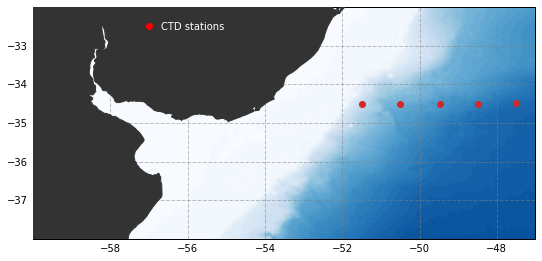

In [68]:
projection = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=dict(projection=projection))
ax.set_extent(extent)

# Plot topography
bat['topo'].plot.contourf(
        ax=ax,levels=np.linspace(-6000,100,50),add_colorbar=False,extend='neither',cmap='Blues_r',transform=projection)

_ = ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                                edgecolor='face', facecolor='0.2'),
                                                zorder=3)

ctdsection.plot.scatter('longitude','latitude',color='tab:red',transform=projection)

plt.plot(-57,-32.5,'ro',transform=projection,zorder=5)
plt.text(-56.7,-32.6,'CTD stations',color='w',transform=projection,zorder=5)

# _ = ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coast', '10m',
#                                                 zorder=3)

gl = ax.gridlines(draw_labels=True,linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = gl.ylabels_right = False

gl.xlocator = mticker.FixedLocator(np.arange(extent[0],extent[1]+2,2))
gl.ylocator = mticker.FixedLocator(np.arange(extent[2],extent[3]+1,1))

plt.savefig('../Figures/studyregion.png',
            dpi=400,
            bbox_inches='tight', 
            transparent=True,
            pad_inches=0)